In [1]:
import pandas as pd
cgvs = pd.read_csv("./final project/cgv.csv")
cgvs

,Unnamed: 0,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm,text
0,0,303873,CJ CGV,79160,Y,사업보고서 (2021.12),20220321001182,CJ CGV,20220321,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...
1,1,303873,CJ CGV,79160,Y,사업보고서 (2020.12),20210319001272,CJ CGV,20210319,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...
2,2,303873,CJ CGV,79160,Y,사업보고서 (2019.12),20200330003232,CJ CGV,20200330,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...
3,3,303873,CJ CGV,79160,Y,[기재정정]사업보고서 (2018.12),20190702000269,CJ CGV,20190702,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...
4,4,303873,CJ CGV,79160,Y,사업보고서 (2017.12),20180330003675,CJ CGV,20180330,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...
5,5,303873,CJ CGV,79160,Y,사업보고서 (2016.12),20170331004598,CJ CGV,20170331,연,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...


In [2]:
from collections import Counter #데이터의 개수를 정리할 수 있는 모듈
from konlpy.tag import Kkma #형태소 분석기 호출
from konlpy.utils import pprint #유니코드 문자 출력
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용


kkma = Kkma()

nouns_af_covid=[] #nouns_list생성


for item in cgvs['text'][0:3]: # [:]전체 #[ ]안의 숫자에 따라 분석 단어 개수 변화

    sentence_list = kkma.sentences(item)

   
    for sentence in sentence_list:

        nouns = kkma.pos(sentence) #sentence의 형태소 분석

        for pos in nouns:

            if pos[1] == 'NNG' or pos[1] == 'NNP': #일반 명사와 고유 명사일 경우

                nouns_af_covid+=[pos[0]] #nouns_af_covid에 추가


count_af_covid = Counter(nouns_af_covid) #nouns_af_covid 내 항목명과 항목별 개수

In [3]:
ignore = ['영업','사이트','당사','사항','전년','자산','증','임','회사','부','뜨','박스','현금','비','수','의','말','여', 1,'가'
         ,'흐름','관련','사업','오피스','여','파생','본','개','을','당','자료','환경','해당','환','콘','텐트','경우','밖','원','연'
        '결','투','액','전','미','표','감','라','총','유','시','마','바','별','향','외','가','약','기','점','폭','각','인','보고',
        '여','포','디','습','고','일','공','폼','간'] #제거할 불필요한 단어 및 표현 리스트

 

for word in ignore:

    if word in count_af_covid:

        del count_af_covid [word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거


In [4]:
from collections import Counter #데이터의 개수를 정리할 수 있는 모듈
from konlpy.tag import Kkma #형태소 분석기 호출
from konlpy.utils import pprint #유니코드 문자 출력
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용


kkma = Kkma()

nouns_bf_covid=[] #nouns_list생성


for item in cgvs['text'][3:]: # [:]전체 #[ ]안의 숫자에 따라 분석 단어 개수 변화

    sentence_list = kkma.sentences(item)

   
    for sentence in sentence_list:

        nouns = kkma.pos(sentence) #sentence의 형태소 분석

        for pos in nouns:

            if pos[1] == 'NNG' or pos[1] == 'NNP': #일반 명사와 고유 명사일 경우

                nouns_bf_covid+=[pos[0]] #nouns_bf_covid에 추가


count_bf_covid = Counter(nouns_bf_covid) #nouns_bf_covid 내 항목명과 항목별 개수

In [5]:
ignore = ['영업','사이트','당사','사항','전년','자산','증','임','회사','부','뜨','박스','현금','비','수','의','말','여', 1,'가'
         ,'흐름','관련','사업','오피스','여','파생','본','개','을','당','자료','환경','해당','환','콘','텐트','경우','밖','원','연'
        '결','투','액','전','미','표','감','라','총','유','시','마','바','별','향','외','가','약','기','점','폭','각','인','보고',
        '여','포','디','습','고','일','공','폼','간'] #제거할 불필요한 단어 및 표현 리스트

 

for word in ignore:

    if word in count_bf_covid:

        del count_bf_covid [word] #위에서 정한 불필요한 단어 및 표현 리스트에 속한 단어 및 표현을 제거

In [6]:
from operator import itemgetter

sorted_count_af_covid = sorted(count_af_covid.items(), key=itemgetter(1), reverse=True)
sorted_count_af_covid

[('위험', 104),
 ('감소', 88),
 ('이익', 88),
 ('매출액', 75),
 ('변동', 73),
 ('통화', 73),
 ('증가', 68),
 ('계약', 64),
 ('손익', 63),
 ('재무', 54),
 ('코로나', 53),
 ('차입금', 52),
 ('평가', 50),
 ('상품', 42),
 ('손상', 41),
 ('수치', 41),
 ('정보', 39),
 ('터키', 39),
 ('영향', 38),
 ('활동', 38),
 ('예상', 37),
 ('거래', 37),
 ('회피', 37),
 ('실적', 36),
 ('현재', 36),
 ('보고서', 36),
 ('기준', 36),
 ('환율', 36),
 ('손실', 35),
 ('비용', 35),
 ('반영', 34),
 ('추정', 33),
 ('미래', 33),
 ('재무제표', 33),
 ('사채', 32),
 ('마진', 32),
 ('이익률', 32),
 ('인식', 32),
 ('부채', 31),
 ('계산서', 31),
 ('매출', 31),
 ('관리', 31),
 ('현황', 30),
 ('참조', 30),
 ('시장', 29),
 ('유동', 29),
 ('자금', 28),
 ('실체', 28),
 ('법인', 27),
 ('사용', 27),
 ('대비', 27),
 ('운영', 26),
 ('계획', 25),
 ('당기', 25),
 ('적자', 25),
 ('다음', 25),
 ('이자율', 25),
 ('포함', 24),
 ('투자', 24),
 ('기말', 24),
 ('외화', 24),
 ('연', 24),
 ('결', 24),
 ('기록', 23),
 ('영업외', 23),
 ('전국', 23),
 ('국내', 22),
 ('포괄', 22),
 ('자본', 21),
 ('중국', 20),
 ('체결', 20),
 ('결정', 19),
 ('분류', 19),
 ('금융', 19),
 ('예측', 18),
 ('요인', 18),
 ('

In [7]:
from operator import itemgetter

sorted_count_bf_covid = sorted(count_bf_covid.items(), key=itemgetter(1), reverse=True)
sorted_count_bf_covid

[('이익', 259),
 ('위험', 247),
 ('증가', 216),
 ('감소', 182),
 ('매출액', 165),
 ('손익', 159),
 ('변동', 150),
 ('통화', 146),
 ('차입금', 145),
 ('계약', 139),
 ('재무', 124),
 ('평가', 118),
 ('터키', 115),
 ('상품', 111),
 ('정보', 104),
 ('예상', 99),
 ('시장', 94),
 ('회피', 93),
 ('실적', 92),
 ('기준', 91),
 ('거래', 90),
 ('보고서', 89),
 ('현재', 88),
 ('반영', 87),
 ('수치', 85),
 ('추정', 84),
 ('미래', 81),
 ('영향', 80),
 ('활동', 80),
 ('손실', 77),
 ('계산서', 75),
 ('환율', 75),
 ('부채', 74),
 ('인식', 74),
 ('중국', 72),
 ('재무제표', 72),
 ('이자율', 72),
 ('관리', 71),
 ('현황', 69),
 ('매출', 69),
 ('기말', 69),
 ('참조', 68),
 ('비용', 67),
 ('마진', 67),
 ('계획', 66),
 ('유동', 65),
 ('이익률', 65),
 ('자금', 64),
 ('사채', 64),
 ('코로나', 63),
 ('손상', 63),
 ('체결', 60),
 ('포괄', 60),
 ('포함', 59),
 ('다음', 59),
 ('요인', 58),
 ('법인', 57),
 ('사용', 57),
 ('금융', 57),
 ('투자', 56),
 ('국내', 55),
 ('영업외', 55),
 ('대비', 54),
 ('결정', 53),
 ('외화', 51),
 ('분류', 51),
 ('실체', 50),
 ('악화', 49),
 ('전국', 48),
 ('운영', 47),
 ('자본', 46),
 ('예측', 45),
 ('적자', 45),
 ('정책', 45),
 ('당기', 44),


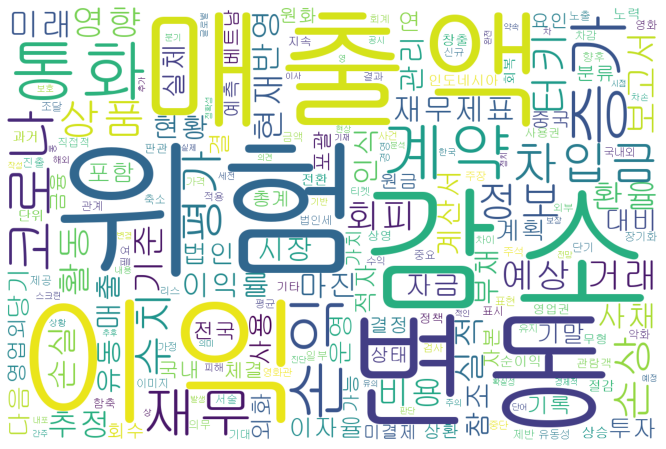

In [8]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('영업')
#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path ="C:/Windows/Fonts/gulim.ttc"

wc = WordCloud(width = 1200, height = 800, stopwords=stopwords ,background_color="white",  font_path=font_path)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(count_af_covid))
plt.axis("off")
plt.show()

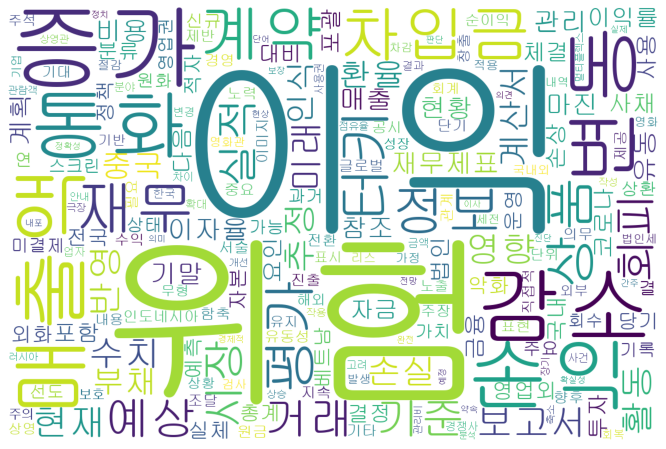

In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path ="C:/Windows/Fonts/gulim.ttc"

wc = WordCloud(width = 1200, height = 800, background_color="white", font_path=font_path)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(count_bf_covid))
plt.axis("off")
plt.show()

In [10]:
x = count_af_covid
 
for key, value in list(x.items()):
    if int(value) <= 60:    # 값이 60이하면
        del x[key]     # 키-값 쌍 삭제
 
print(x)

Counter({'위험': 104, '감소': 88, '이익': 88, '매출액': 75, '변동': 73, '통화': 73, '증가': 68, '계약': 64, '손익': 63})


In [11]:
x1 = count_bf_covid
 
for key, value in list(x1.items()):
    if int(value) <= 140:    # 값이 140이하면
        del x1[key]     # 키-값 쌍 삭제
 
print(x1)

Counter({'이익': 259, '위험': 247, '증가': 216, '감소': 182, '매출액': 165, '손익': 159, '변동': 150, '통화': 146, '차입금': 145})


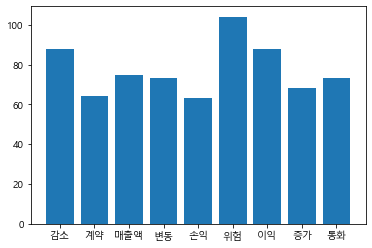

In [12]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import matplotlib.pylab as plt

my_dict = x

myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 


plt.bar(x, y)
plt.show()

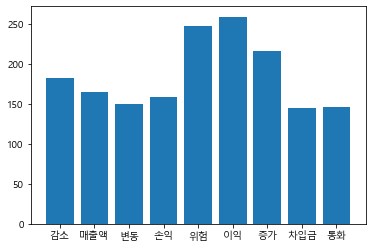

In [13]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import matplotlib.pylab as plt

my_dict = x1

myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 


plt.bar(x, y)
plt.show()